In [9]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Conformers of Fentanyl

## Generation of conformers for docking in Rosetta
Conformers were generated to be used in docking with rosetta. 

In [10]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolTransforms as rdmt
import numpy as np
# from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing, DrawingOptions
from rdkit.Geometry import rdGeometry as geom
import os
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem
from ipywidgets import interact, interactive, fixed

## SMILES of the Fentanyl:

* Fentanyl
* CCC(=O)N(C1CC[N+](CC1)CCC2=CC=CC=C2)C3=CC=CC=C3


### SMILES taken from pubchem

In [11]:
def drawit(m,p,confId=-1):
    mb = Chem.MolToMolBlock(m,confId=confId)
    p.removeAllModels()
    p.addModel(mb,'sdf')
    p.setStyle({'stick':{}})
    p.setBackgroundColor('0xeeeeee')
    p.zoomTo()
    return p.show()

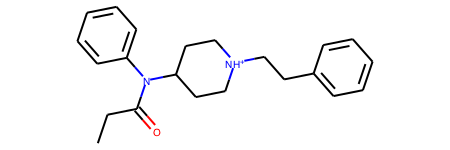

In [12]:
# backbone for alignment
# smiles from pubchem
isomeric_smiles = 'CCC(=O)N(C1CC[NH+](CC1)CCC2=CC=CC=C2)C3=CC=CC=C3'
m0 = Chem.MolFromSmiles(isomeric_smiles)
m0

In [13]:
# conformations
confs = 25
rmsthreshold=0.1
m0 = Chem.AddHs(m0)

In [14]:
conf_dim_ = AllChem.EmbedMultipleConfs(m0, numConfs=confs,useBasicKnowledge=True,\
                                      pruneRmsThresh=rmsthreshold,useExpTorsionAnglePrefs=True)
conf_dim = len(conf_dim_) -1 
# Do a short minimization and compute the RMSD
for cid in conf_dim_:
    _ = AllChem.MMFFOptimizeMolecule(m0, confId=cid)
rms_m0 = Chem.AllChem.GetConformerRMSMatrix(m0)
# align to one of the ring systems:
AllChem.AlignMolConformers(m0,m0.GetSubstructMatch(Chem.MolFromSmarts(isomeric_smiles)))
# now construct the view and interactive widget:
p = py3Dmol.view(width=400,height=400)
interact(drawit, m=fixed(m0),p=fixed(p),confId=(0,m0.GetNumConformers()-1));

In [6]:
writer3 = Chem.SDWriter("fentanyl.sdf")
for i in conf_dim_:
    writer3.write(m0,confId=i)

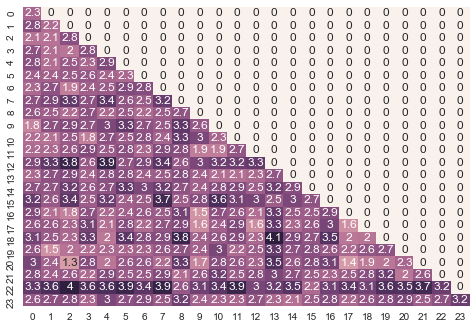

In [7]:
import numpy as np
import matplotlib.pyplot as plt
data = rms_m0
arr = np.zeros((conf_dim,conf_dim))
indices = np.tril_indices(conf_dim)
arr[indices] = data
import seaborn as sns; sns.set()
ax = sns.heatmap(arr, annot=True, fmt=".2g",cbar=False)
plt.show()

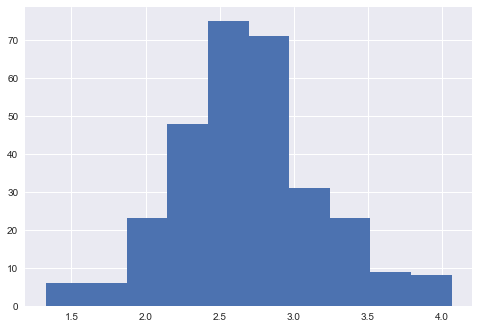

In [8]:
plt.hist(rms_m0)
plt.show()